In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Loan_train.csv')
df_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [3]:
df_train.drop('id',axis=1,inplace=True)
df_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [4]:
df_train.nunique()

person_age                      53
person_income                 2641
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      545
loan_int_rate                  362
loan_percent_income             61
cb_person_default_on_file        2
cb_person_cred_hist_length      29
loan_status                      2
dtype: int64

In [5]:
df_train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
print(df_train.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['loan_intent', 'person_home_ownership', 'cb_person_default_on_file']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categorical_features)], remainder='passthrough')

df_train_encoded = ct.fit_transform(df_train)
encoded_features =  ct.named_transformers_['encoder'].get_feature_names_out(categorical_features)

df_train_encoded = pd.DataFrame(df_train_encoded, columns=list(encoded_features) + list(df_train.drop(columns=categorical_features).columns))
df_train_encoded.reset_index(drop=True, inplace=True)

df_train_encoded

,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37,35000,0.0,B,6000,11.49,0.17,14,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,22,56000,6.0,C,4000,13.35,0.07,2,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29,28800,8.0,A,6000,8.9,0.21,10,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,70000,14.0,B,12000,11.11,0.17,5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22,60000,2.0,A,6000,6.92,0.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,120000,5.0,D,25000,15.95,0.21,10,0
58641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28,28800,0.0,C,10000,12.73,0.35,8,1
58642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,44000,7.0,D,6800,16.0,0.15,2,1
58643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22,30000,2.0,A,5000,8.9,0.17,3,0


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train_encoded['loan_grade'] = le.fit_transform(df_train_encoded['loan_grade'])

df_train_encoded

,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37,35000,0.0,1,6000,11.49,0.17,14,0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,22,56000,6.0,2,4000,13.35,0.07,2,0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29,28800,8.0,0,6000,8.9,0.21,10,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30,70000,14.0,1,12000,11.11,0.17,5,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22,60000,2.0,0,6000,6.92,0.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34,120000,5.0,3,25000,15.95,0.21,10,0
58641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28,28800,0.0,2,10000,12.73,0.35,8,1
58642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,44000,7.0,3,6800,16.0,0.15,2,1
58643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22,30000,2.0,0,5000,8.9,0.17,3,0


In [9]:
corr = df_train_encoded.corr()

print(corr['loan_status'])

loan_intent_EDUCATION         -0.051005
loan_intent_HOMEIMPROVEMENT    0.031063
loan_intent_MEDICAL            0.049139
loan_intent_PERSONAL          -0.012461
loan_intent_VENTURE           -0.064378
person_home_ownership_OTHER    0.002918
person_home_ownership_OWN     -0.087556
person_home_ownership_RENT     0.239620
cb_person_default_on_file_Y    0.186962
person_age                    -0.001130
person_income                 -0.169956
person_emp_length             -0.100428
loan_grade                     0.385908
loan_amnt                      0.144982
loan_int_rate                  0.338948
loan_percent_income            0.378280
cb_person_cred_hist_length    -0.003030
loan_status                    1.000000
Name: loan_status, dtype: float64


loan_intent_EDUCATION           1.429639
loan_intent_HOMEIMPROVEMENT     2.541384
loan_intent_MEDICAL             1.610233
loan_intent_PERSONAL            1.749645
loan_intent_VENTURE             1.750445
person_home_ownership_OTHER    25.611866
person_home_ownership_OWN       3.968122
person_home_ownership_RENT     -0.086809
cb_person_default_on_file_Y     1.978306
person_age                      1.965497
person_income                  10.457723
person_emp_length                2.05443
loan_grade                      0.869415
loan_amnt                       1.188578
loan_int_rate                    0.20002
loan_percent_income             0.917473
cb_person_cred_hist_length      1.618503
loan_status                     2.046848
dtype: object


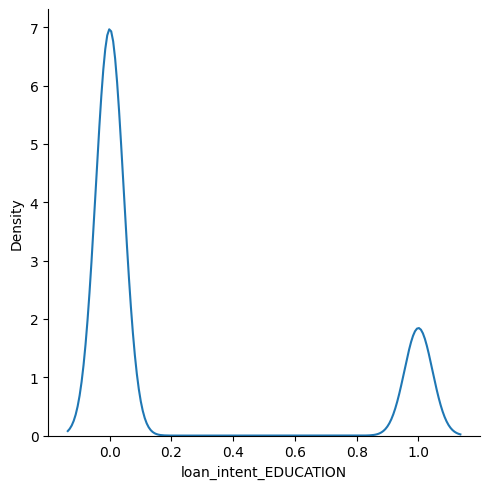

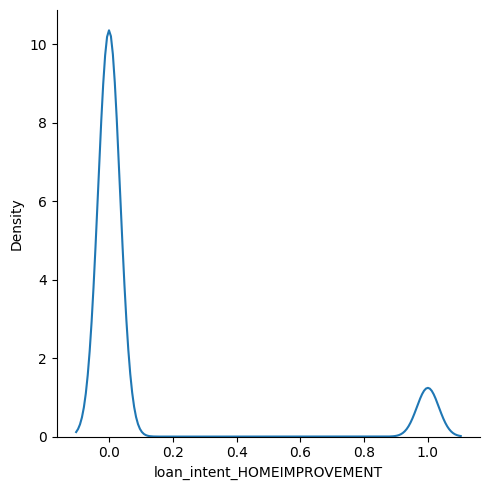

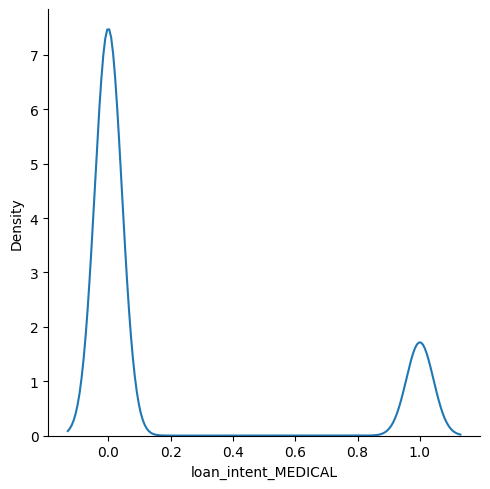

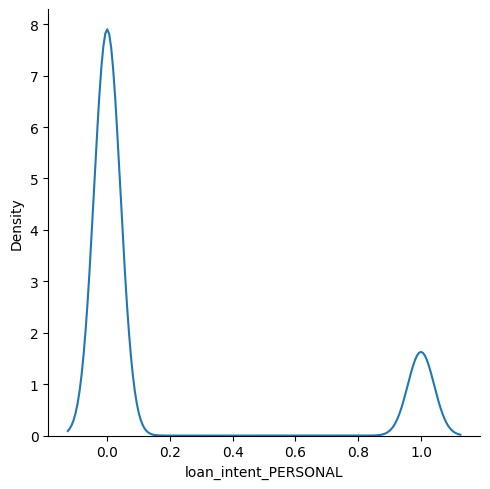

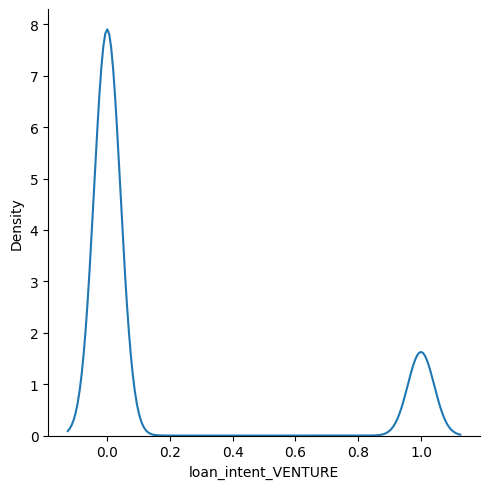

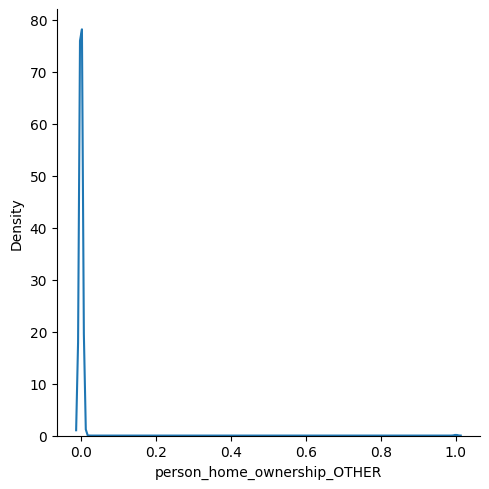

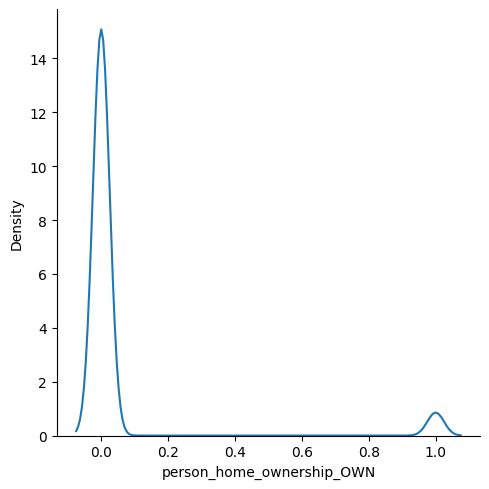

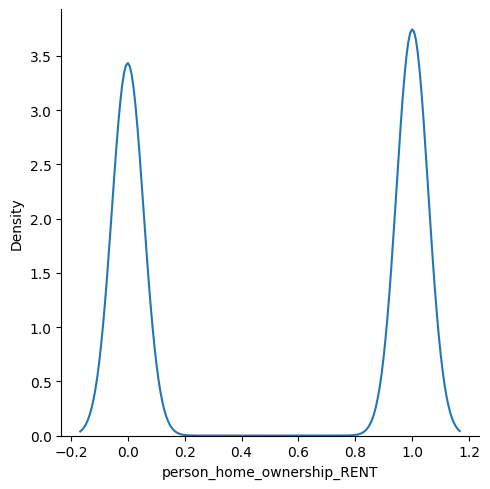

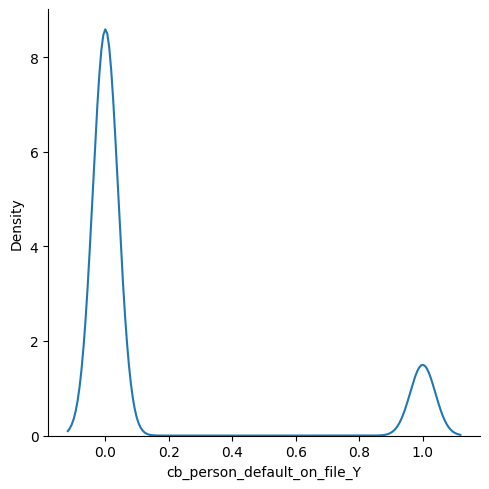

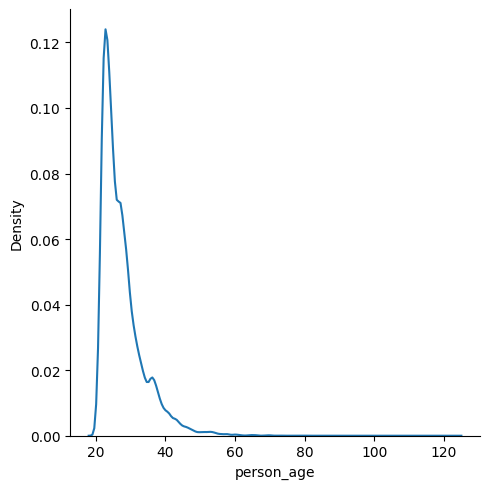

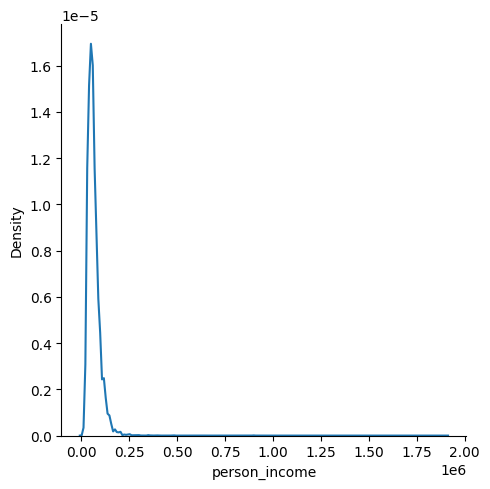

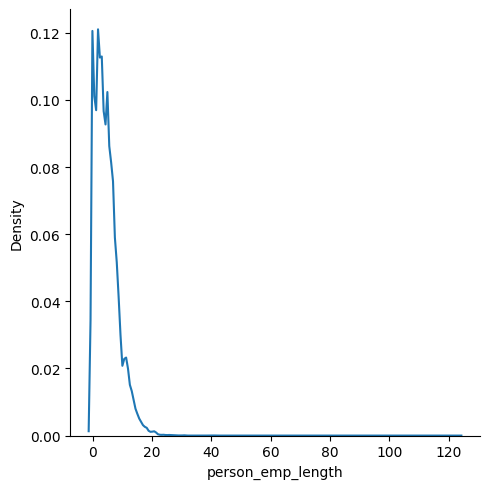

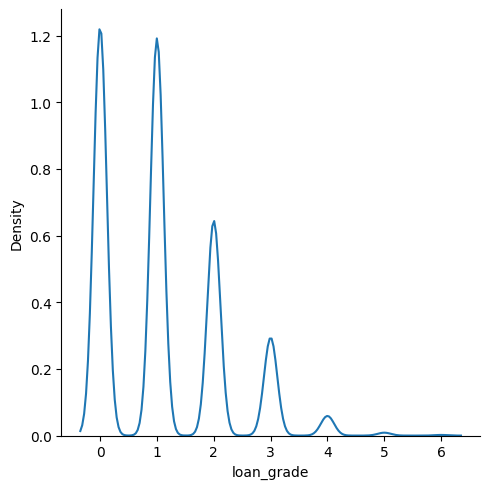

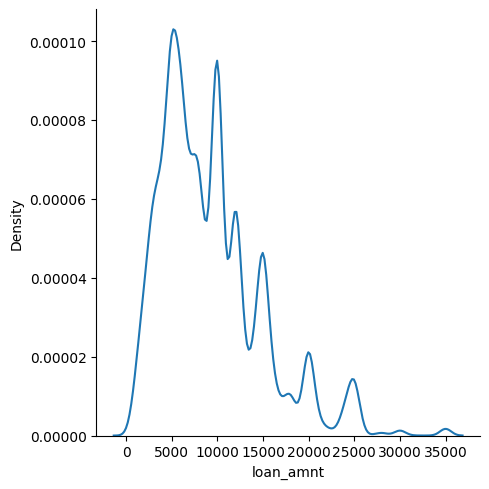

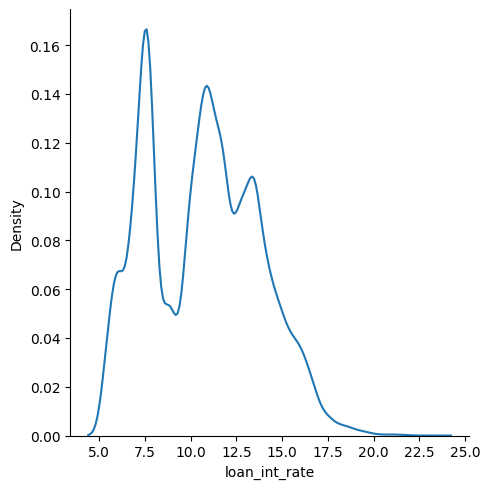

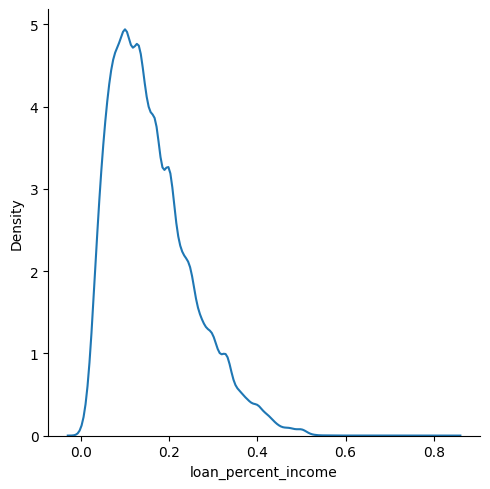

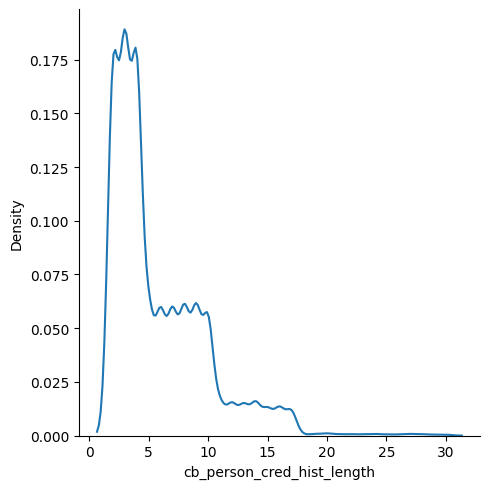

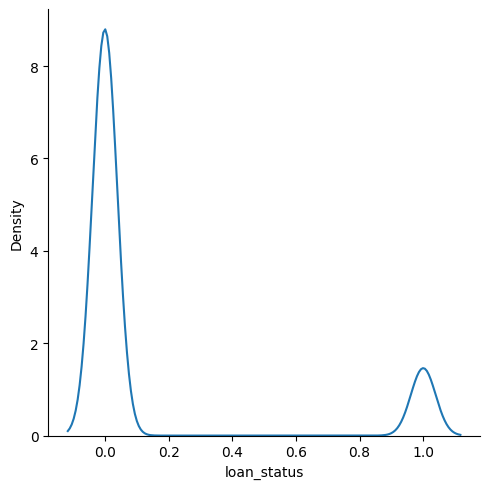

In [10]:
import seaborn as sns

for i in df_train_encoded.columns:
    sns.displot(df_train_encoded[i], kind='kde')
print(df_train_encoded.skew())

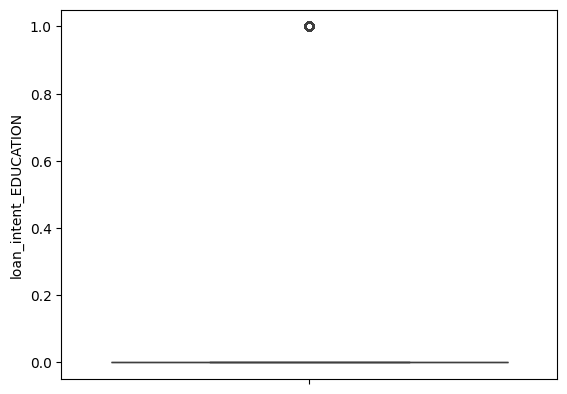

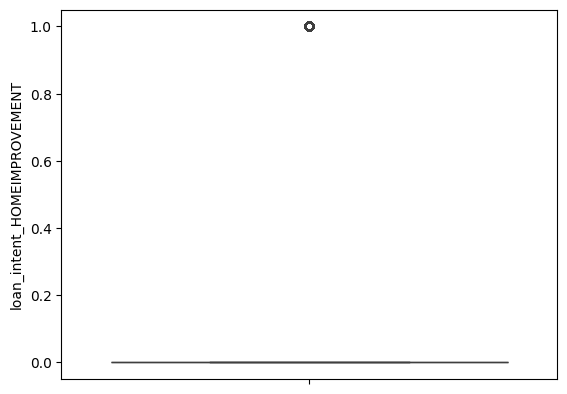

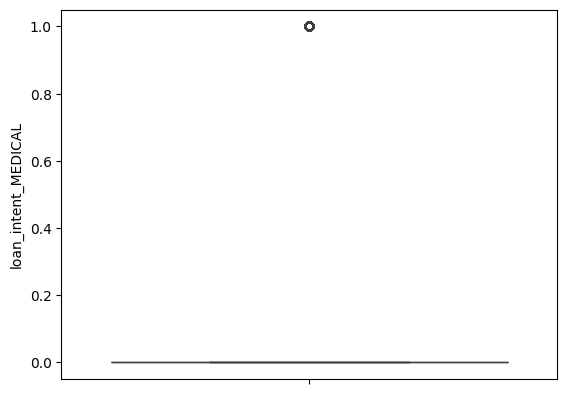

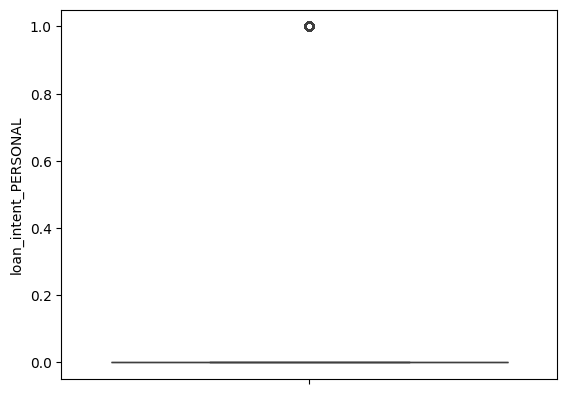

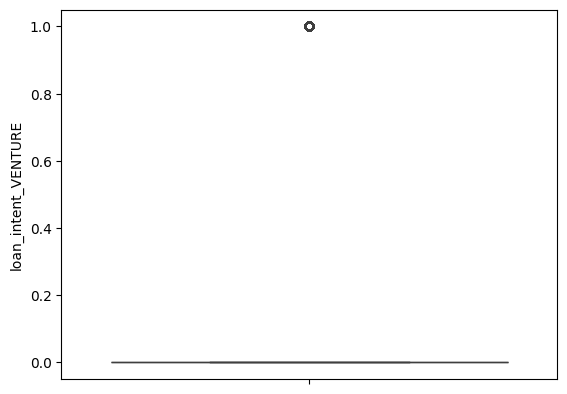

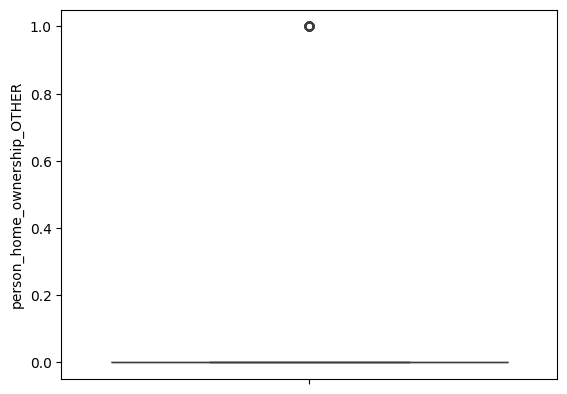

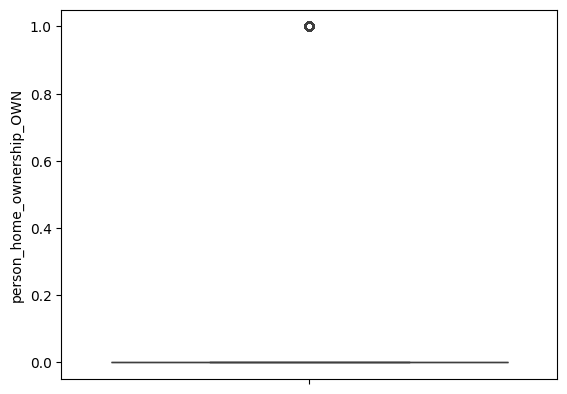

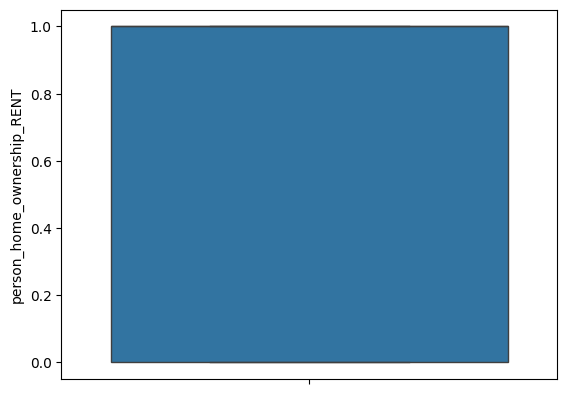

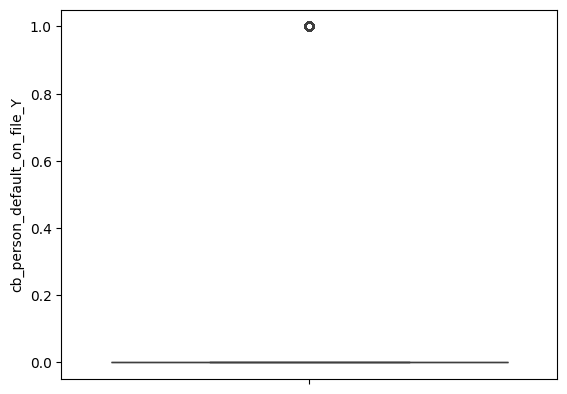

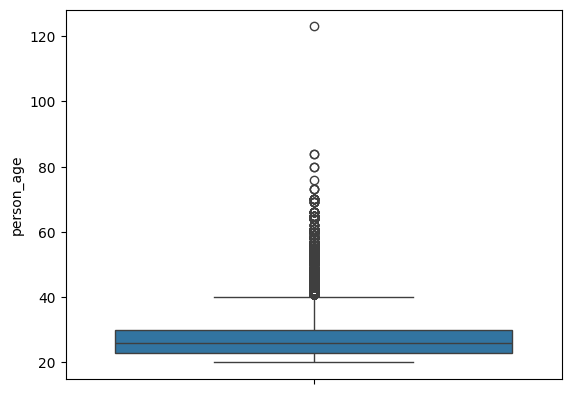

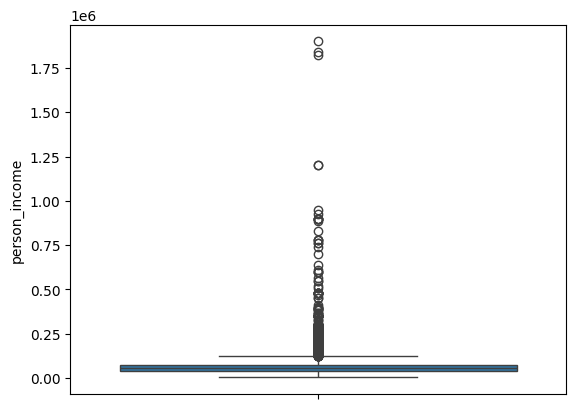

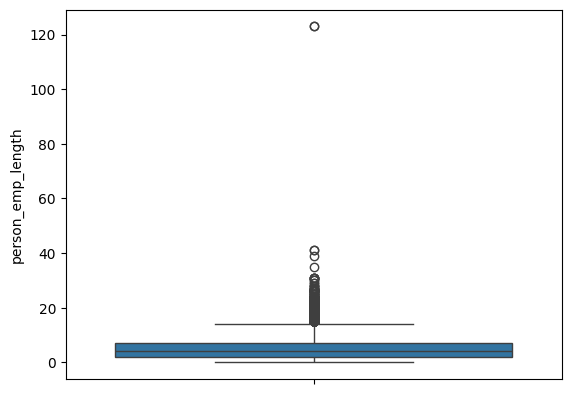

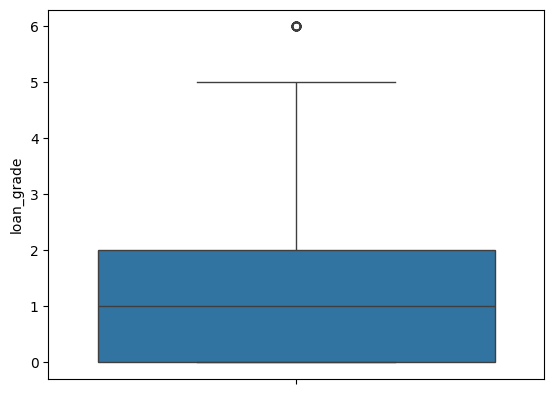

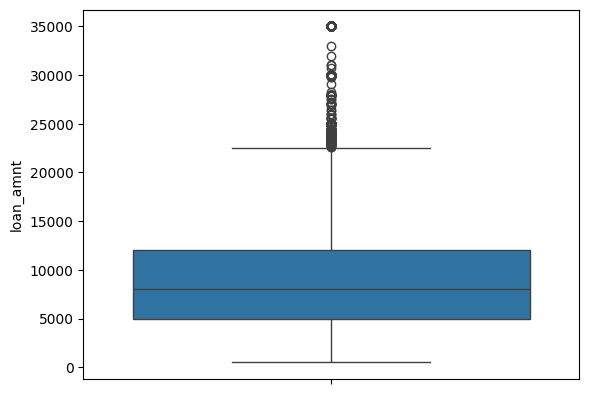

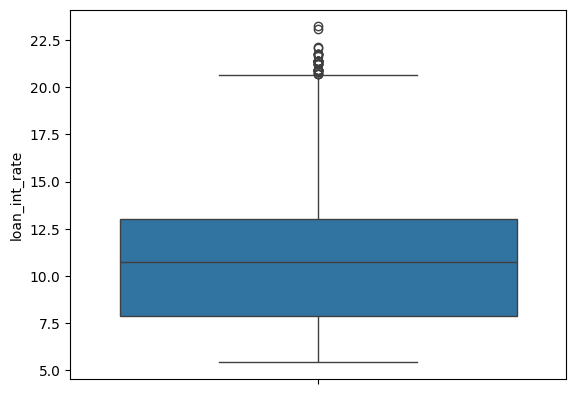

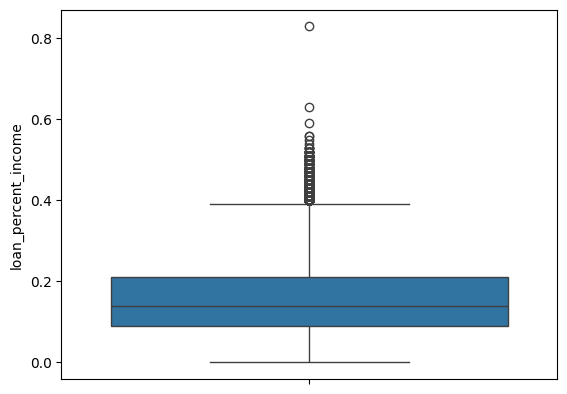

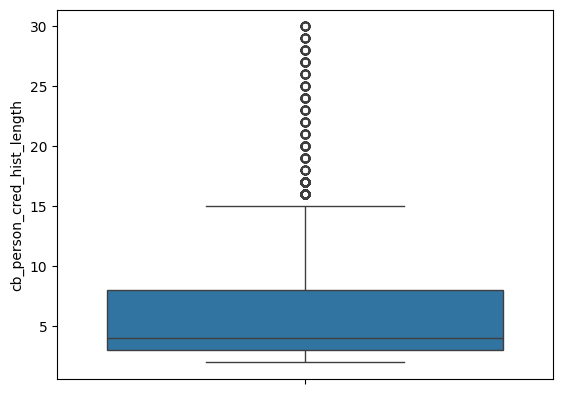

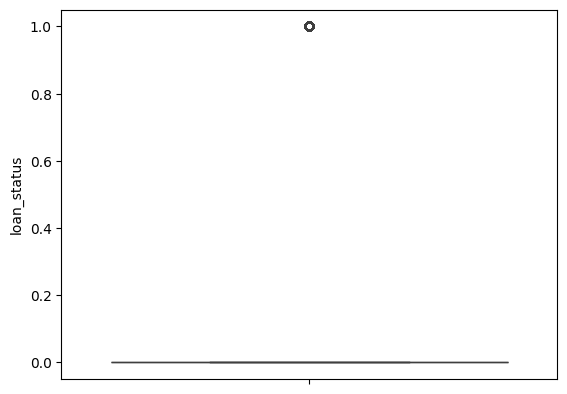

In [11]:
for i in df_train_encoded.columns:
    sns.boxplot(df_train_encoded[i])
    plt.show()

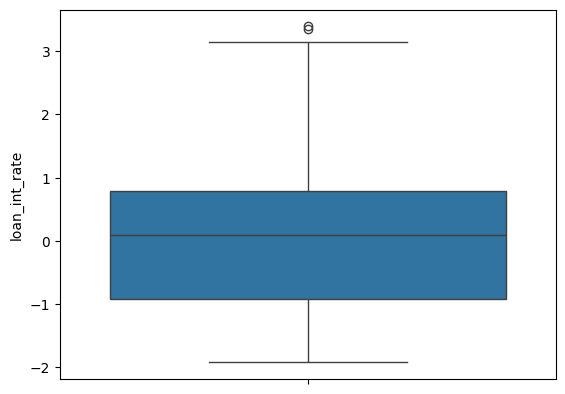

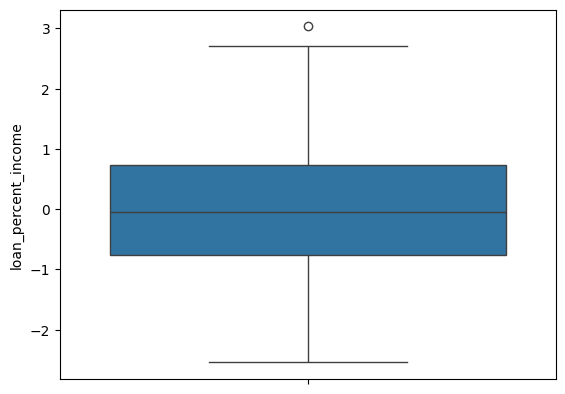

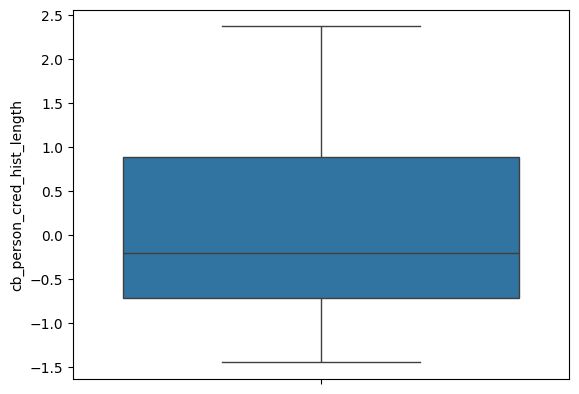

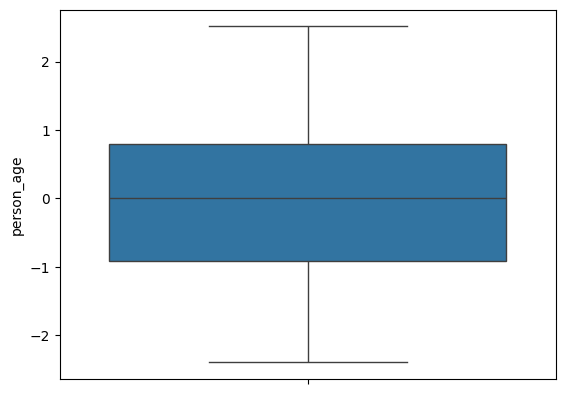

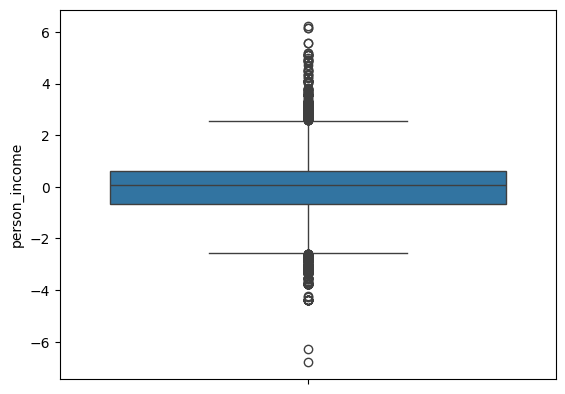

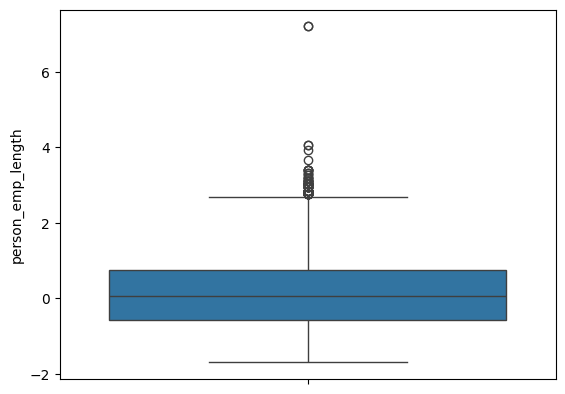

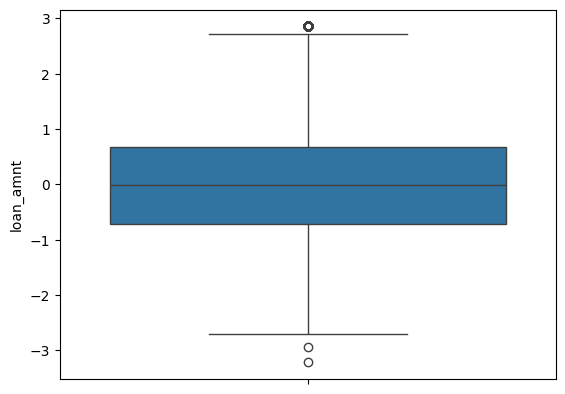

In [12]:
from sklearn.preprocessing import PowerTransformer

pf = PowerTransformer(method='yeo-johnson')

columns = {'cb_person_cred_hist_length', 'loan_percent_income', 'loan_int_rate', 'loan_amnt', 'person_emp_length', 'person_income', 'person_age'}

for i in columns:
    df_train_encoded[i] = pf.fit_transform(df_train_encoded[[i]])
    sns.boxplot(df_train_encoded[i])
    plt.show()

<Axes: ylabel='person_income'>

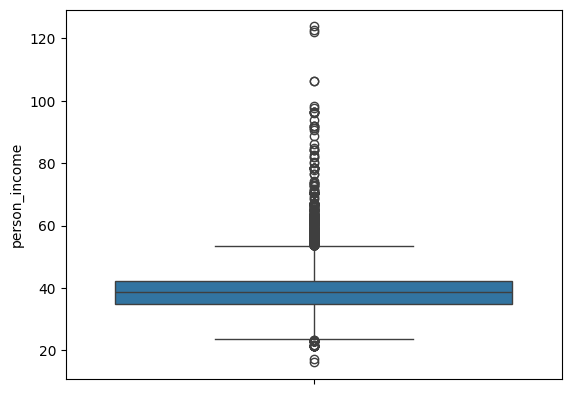

In [13]:
df_train_encoded['person_income'] = np.cbrt(df_train['person_income'])
sns.boxplot(df_train_encoded['person_income'])

<Axes: ylabel='person_emp_length'>

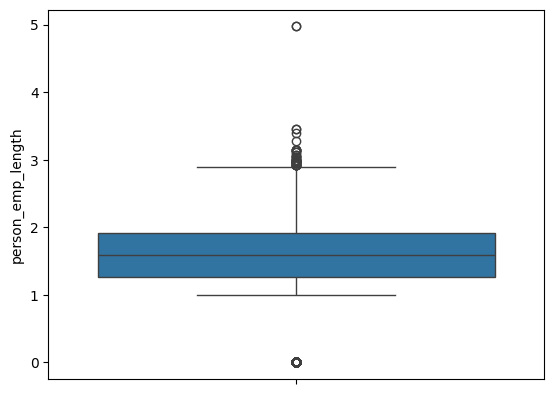

In [14]:
df_train_encoded['person_emp_length'] = np.cbrt(df_train['person_emp_length'])
sns.boxplot(df_train_encoded['person_emp_length'])

In [15]:
corr = df_train_encoded.corr()

print(corr['loan_status'])

loan_intent_EDUCATION         -0.051005
loan_intent_HOMEIMPROVEMENT    0.031063
loan_intent_MEDICAL            0.049139
loan_intent_PERSONAL          -0.012461
loan_intent_VENTURE           -0.064378
person_home_ownership_OTHER    0.002918
person_home_ownership_OWN     -0.087556
person_home_ownership_RENT     0.239620
cb_person_default_on_file_Y    0.186962
person_age                    -0.012890
person_income                 -0.223441
person_emp_length             -0.106837
loan_grade                     0.385908
loan_amnt                      0.129534
loan_int_rate                  0.324627
loan_percent_income            0.320198
cb_person_cred_hist_length    -0.011919
loan_status                    1.000000
Name: loan_status, dtype: float64


In [16]:
df_train_encoded.skew()

loan_intent_EDUCATION           1.429639
loan_intent_HOMEIMPROVEMENT     2.541384
loan_intent_MEDICAL             1.610233
loan_intent_PERSONAL            1.749645
loan_intent_VENTURE             1.750445
person_home_ownership_OTHER    25.611866
person_home_ownership_OWN       3.968122
person_home_ownership_RENT     -0.086809
cb_person_default_on_file_Y     1.978306
person_age                      0.166768
person_income                   1.044408
person_emp_length              -0.960497
loan_grade                      0.869415
loan_amnt                      -0.012053
loan_int_rate                  -0.038806
loan_percent_income             0.078826
cb_person_cred_hist_length      0.093291
loan_status                     2.046848
dtype: object

In [17]:
df_train_encoded_ = df_train_encoded.drop(columns={'person_age'}, axis=1)
catcol = df_train_encoded_.select_dtypes(include='object')

for i in catcol:
    df_train_encoded_[i] = df_train_encoded_[i].astype(float)

df_train_encoded_.dtypes

loan_intent_EDUCATION          float64
loan_intent_HOMEIMPROVEMENT    float64
loan_intent_MEDICAL            float64
loan_intent_PERSONAL           float64
loan_intent_VENTURE            float64
person_home_ownership_OTHER    float64
person_home_ownership_OWN      float64
person_home_ownership_RENT     float64
cb_person_default_on_file_Y    float64
person_income                  float64
person_emp_length              float64
loan_grade                       int32
loan_amnt                      float64
loan_int_rate                  float64
loan_percent_income            float64
cb_person_cred_hist_length     float64
loan_status                    float64
dtype: object

In [72]:
from sklearn.model_selection import train_test_split

Features = df_train_encoded_.drop('loan_status',axis=1)
Labels = df_train_encoded_['loan_status']

# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# Features_resampled, Labels_resampled = smote.fit_resample(Features, Labels)

# Features_resampled = Features_resampled.reset_index(drop=True)

Features_train, Features_test, Labels_train, Labels_test = train_test_split(Features, Labels, test_size=0.2, shuffle=True, random_state=42)

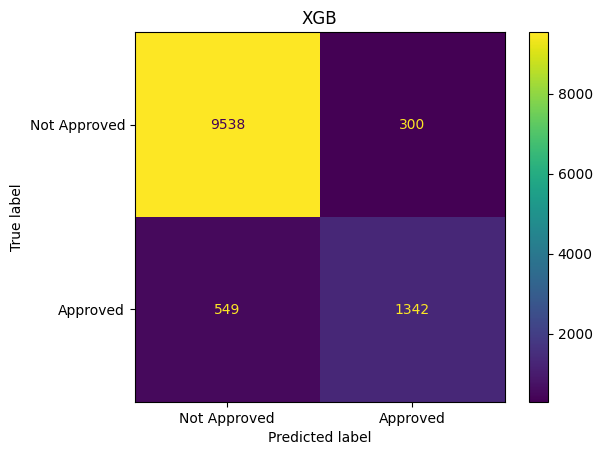

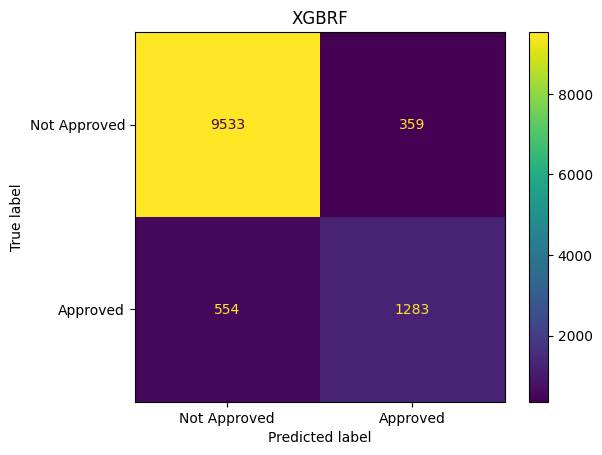

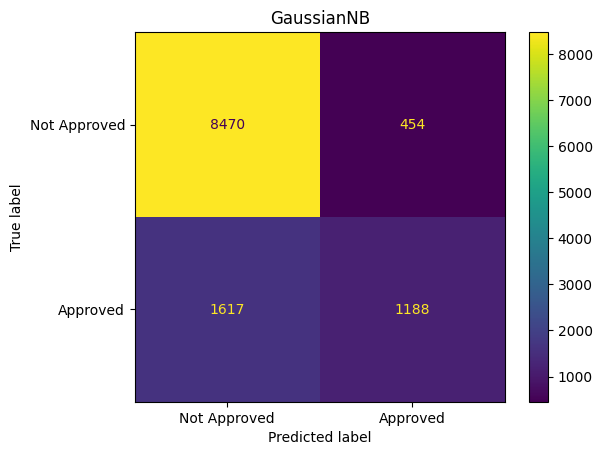

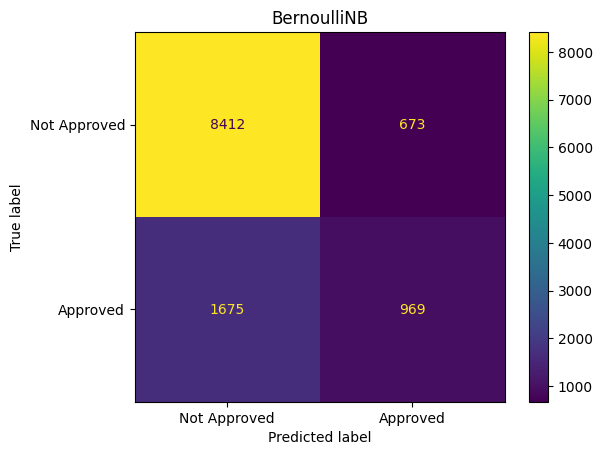

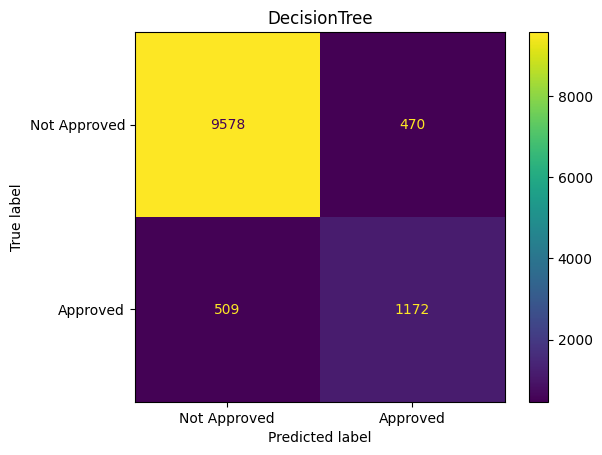

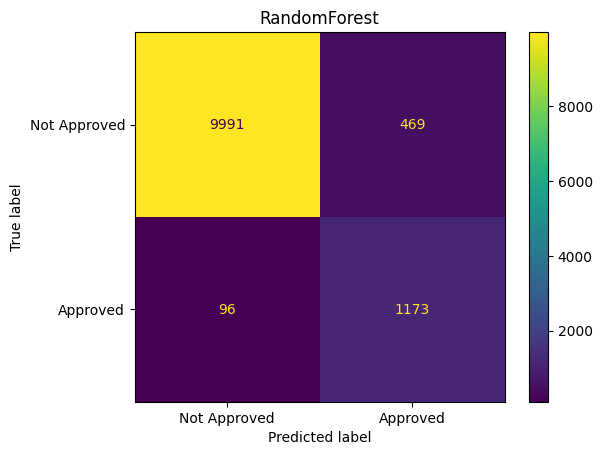

c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


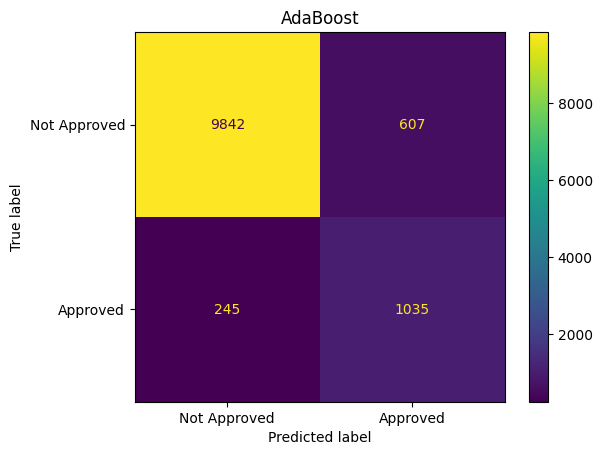

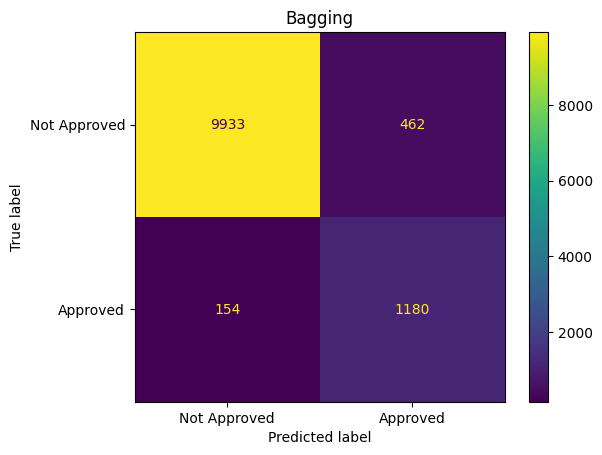

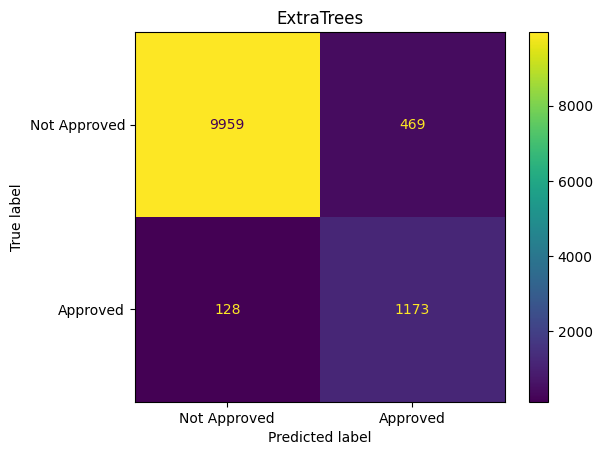

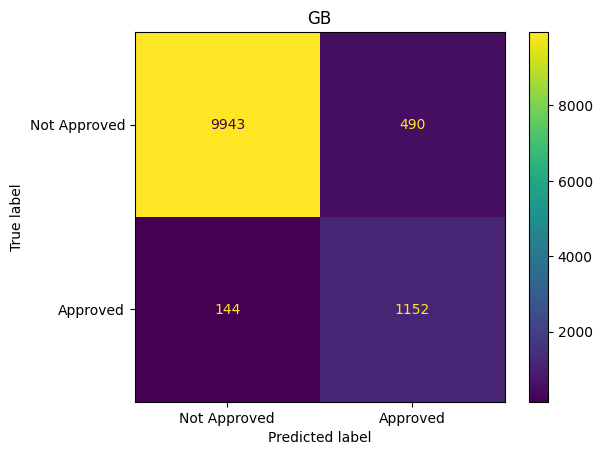

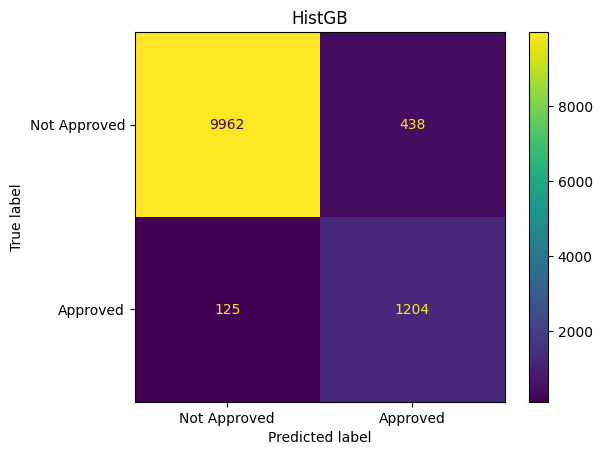

c:\Users\jinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


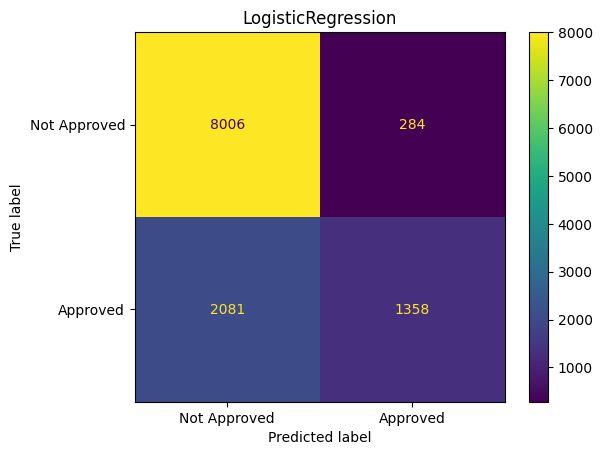

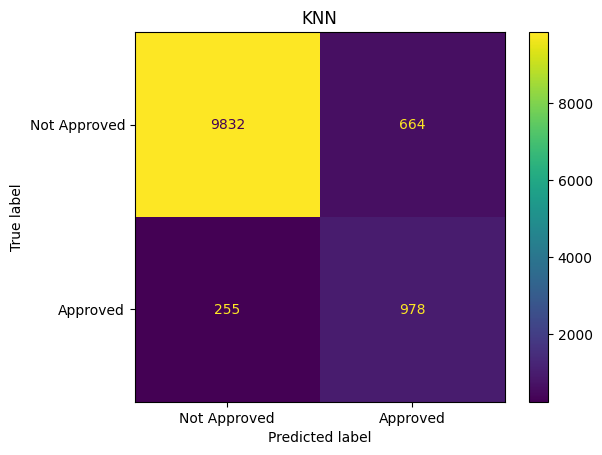

[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


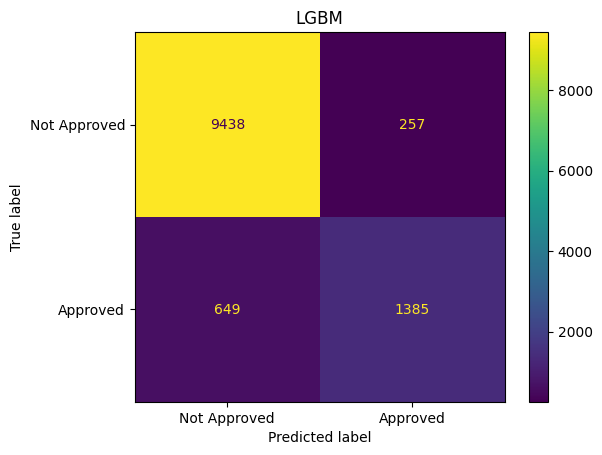

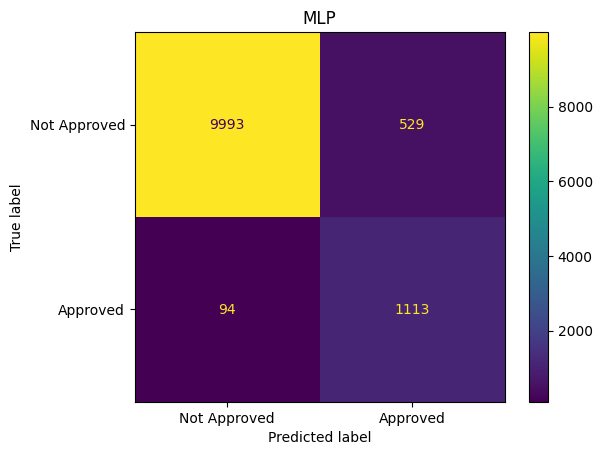

In [73]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from imxgboost.imbalance_xgb import imbalance_xgboost

Model_dict = {'XGB': XGBClassifier(scale_pos_weight=len(Labels[Labels == 0]) / len(Labels[Labels == 1])), 'XGBRF': XGBRFClassifier(scale_pos_weight=len(Labels[Labels == 0]) / len(Labels[Labels == 1])), 'GaussianNB': GaussianNB(), 'BernoulliNB': BernoulliNB(class_prior=[0.75, 0.25]),'DecisionTree': DecisionTreeClassifier(class_weight='balanced'), 'RandomForest': RandomForestClassifier(class_weight='balanced'), 'AdaBoost': AdaBoostClassifier(), 'Bagging': BaggingClassifier(), 'ExtraTrees': ExtraTreesClassifier(class_weight='balanced'), 'GB': GradientBoostingClassifier(), 'HistGB': HistGradientBoostingClassifier(), 'LogisticRegression': LogisticRegression(class_weight='balanced'), 'KNN': KNeighborsClassifier(), 'LGBM': LGBMClassifier(class_weight='balanced'), 'MLP': MLPClassifier(max_iter=500)}
Training_Accuracy_dict = {}
Precision_dict = {}
Recall_dict = {}
F1_score_dict = {}
auc_score_dict = {}

for key, val in Model_dict.items():
    val.fit(Features_train, Labels_train)
    
    train_pred = val.predict(Features_test)
    Training_Accuracy = accuracy_score(train_pred, Labels_test)
    Training_Accuracy_dict.update({key:Training_Accuracy})
    Pred_proba = val.predict_proba(Features_test)[:,1]
    
    Precision_dict.update({key:precision_score(train_pred,Labels_test)})
    Recall_dict.update({key:recall_score(train_pred,Labels_test)})
    F1_score_dict.update({key:f1_score(train_pred,Labels_test)})
    auc_score_dict.update({key: roc_auc_score(Labels_test, Pred_proba)})
    
    fig, ax = plt.subplots()
    ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(train_pred,Labels_test), display_labels=['Not Approved', 'Approved']).plot(ax=ax)
    ax.set_title(key)
    plt.show()

In [74]:
accuracy_df = pd.DataFrame()
accuracy_df['Model Name'] = Model_dict.keys()
accuracy_df['Training Accuracy'] = Training_Accuracy_dict.values()
accuracy_df['AUC Score'] = auc_score_dict.values()
accuracy_df['Precision'] = Precision_dict.values()
accuracy_df['Recall'] = Recall_dict.values()
accuracy_df['F1 Score'] = F1_score_dict.values()
accuracy_df

,Model Name,Training Accuracy,AUC Score,Precision,Recall,F1 Score
0,XGB,0.927615,0.952597,0.817296,0.709677,0.759694
1,XGBRF,0.922159,0.932703,0.781364,0.698421,0.737568
2,GaussianNB,0.823429,0.872728,0.723508,0.423529,0.534293
3,BernoulliNB,0.799812,0.802530,0.590134,0.366490,0.452170
4,DecisionTree,0.916532,0.831651,0.713764,0.697204,0.705387
5,RandomForest,0.951829,0.942264,0.714373,0.924350,0.805909
6,AdaBoost,0.927360,0.926270,0.630329,0.808594,0.708419
7,Bagging,0.947481,0.918557,0.718636,0.884558,0.793011
8,ExtraTrees,0.949101,0.923754,0.714373,0.901614,0.797146
9,GB,0.945946,0.943534,0.701583,0.888889,0.784207


In [75]:
df_test = pd.read_csv('Loan_test.csv')

submission_csv = pd.DataFrame()
submission_csv['id'] = df_test['id']

df_test.drop(columns={'id', 'person_age'},axis=1,inplace=True)

df_test_encoded = ct.fit_transform(df_test)
encoded_features =  ct.named_transformers_['encoder'].get_feature_names_out(categorical_features)

df_test_encoded = pd.DataFrame(df_test_encoded, columns=list(encoded_features) + list(df_test.drop(columns=categorical_features).columns))
df_test_encoded.reset_index(drop=True, inplace=True)

df_test_encoded['loan_grade'] = le.fit_transform(df_test_encoded['loan_grade'])

catcol = df_test_encoded.select_dtypes(include='object')

for i in catcol:
    df_test_encoded[i] = df_test_encoded[i].astype(float)

df_test_encoded.dtypes

loan_intent_EDUCATION          float64
loan_intent_HOMEIMPROVEMENT    float64
loan_intent_MEDICAL            float64
loan_intent_PERSONAL           float64
loan_intent_VENTURE            float64
person_home_ownership_OTHER    float64
person_home_ownership_OWN      float64
person_home_ownership_RENT     float64
cb_person_default_on_file_Y    float64
person_income                  float64
person_emp_length              float64
loan_grade                       int32
loan_amnt                      float64
loan_int_rate                  float64
loan_percent_income            float64
cb_person_cred_hist_length     float64
dtype: object

In [77]:
lgbm = LGBMClassifier(class_weight='balanced')
lgbm.fit(Features_train, Labels_train)

y_pred = lgbm.predict(df_test_encoded)
y_pred_proba = lgbm.predict_proba(df_test_encoded)[:,1]

submission_csv['loan_status'] = y_pred_proba
submission_csv.to_csv('202201473_EDA_Lab7.csv', index=False)

submission_csv

[LightGBM] [Info] Number of positive: 6708, number of negative: 40208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 46916, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,id,loan_status
0,58645,0.198585
1,58646,0.149818
2,58647,0.100299
3,58648,0.175710
4,58649,0.137162
...,...,...
39093,97738,0.078874
39094,97739,0.078998
39095,97740,0.095969
39096,97741,0.231948
